In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import seaborn as sns
from warnings import filterwarnings
import matplotlib.pyplot as plt
filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:\\Users\\nilav\\NCI Cell Lines\\Cisplatin_metabolic_NCI.csv')
data.head(2)

,Cell Line,Acetone ; Propanal ; acetone,Acetaldehyde oxime ; HMDB01122,acetate,Urea,Isopropyl alcohol ; Propyl alcohol,Bicarbonate ; Hydrogen carbonate,Dimethylsulfide,3-Butyn-1-al,1-pyrrolinium,...,O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-[6-deoxy-a-L-galactopyranosyl-(1->4)]-O-b-D-galactopyranosyl-(1->4)-O-[6-deoxy-a-L-galactopyranosyl-(1->3)]-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso6] ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso3]","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z)),cells,Cell names,Cisplatin
0,Breast_BT549,0.021811,0.006137,1.801231,0.178675,0.031762,0.143416,0.004437,0.001118,0.002353,...,0.036367,0.025836,0.075427,0.036502,0.019935,0.032820,0.039391,BT549,BR:BT-549,1.28259
1,Breast_HS578T,0.010611,0.006815,0.884542,0.093390,0.016027,0.037372,NaN,0.005778,0.003199,...,0.024981,0.013982,0.054200,0.029125,0.010750,0.015981,0.035154,HS578T,BR:HS 578T,1.57259


In [3]:
data.fillna(0.0, inplace=True)

In [4]:
drug = data.pop('Cisplatin')
drug.head()

0    1.282590
1    1.572590
2    1.411583
3    1.472878
4    5.638993
Name: Cisplatin, dtype: float64

In [5]:
X = data.select_dtypes('float64')
X.head(2)

,Acetone ; Propanal ; acetone,Acetaldehyde oxime ; HMDB01122,acetate,Urea,Isopropyl alcohol ; Propyl alcohol,Bicarbonate ; Hydrogen carbonate,Dimethylsulfide,3-Butyn-1-al,1-pyrrolinium,Acrylamide,...,PIP2(16:0/18:1(11Z)) ; PIP2(16:0/18:1(9Z)) ; PIP2(16:1(9Z)/18:0) ; PIP2(18:0/16:1(9Z)) ; PIP2(18:1(11Z)/16:0) ; PIP2(18:1(9Z)/16:0),"TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso3]","2,4,7,10-hexadecatetraenoylcoa ; 2,7,10,13-hexadecatetraenoylcoa ; 2E,4Z,7Z,10Z-hexadecatetraenoyl-CoA ; 3,7,10,13-hexadecatetraenoylcoa ; 4,7,10,13-hexadecatetraenoylcoa",O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-[6-deoxy-a-L-galactopyranosyl-(1->4)]-O-b-D-galactopyranosyl-(1->4)-O-[6-deoxy-a-L-galactopyranosyl-(1->3)]-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso6] ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))[iso3]","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z))
0,0.021811,0.006137,1.801231,0.178675,0.031762,0.143416,0.004437,0.001118,0.002353,0.013185,...,0.071269,0.029462,0.029300,0.036367,0.025836,0.075427,0.036502,0.019935,0.032820,0.039391
1,0.010611,0.006815,0.884542,0.093390,0.016027,0.037372,0.000000,0.005778,0.003199,0.011203,...,0.059958,0.026807,0.021282,0.024981,0.013982,0.054200,0.029125,0.010750,0.015981,0.035154


In [6]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

In [7]:
labels = []
drug_mean = drug.mean()
for i in drug:
    if i >= drug_mean:
        labels.append('N')
    else:
        labels.append('R')
y = pd.Series(labels)

In [8]:
drug_mean

4.375066803699898

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = pd.Series(le.fit_transform(y))

In [10]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X,y = smote.fit_resample(X,y)

y.value_counts()

1    36
0    36
dtype: int64

In [11]:
'''
from xgboost import plot_importance
from sklearn.model_selection import train_test_split

model = RandomForestClassifier(class_weight = 'balanced', n_estimators = 150, random_state = 43)
model.fit(X, y)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

'''

'\nfrom xgboost import plot_importance\nfrom sklearn.model_selection import train_test_split\n\nmodel = RandomForestClassifier(class_weight = \'balanced\', n_estimators = 150, random_state = 43)\nmodel.fit(X, y)\nimportances = model.feature_importances_\nindices = np.argsort(importances)[::-1]\n\nplt.figure()\nplt.title("Feature importances")\nplt.bar(range(X.shape[1]), importances[indices],\n        color="lightsalmon", align="center")\nplt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)\nplt.xlim([-1, X.shape[1]])\nplt.show()\n\n'

In [12]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
#sfm = SelectFromModel(model, threshold = 0.006)
#sfm.fit(X,y)

#X = pd.DataFrame(data = sfm.transform(X), columns = X.columns[sfm.get_support(1)])

indices = X.index.values


X_train, X_test, train_index, test_index = train_test_split(X,indices, test_size = 0.33, random_state = 43)
y_train, y_test = y.iloc[train_index], y.iloc[test_index]
model = RandomForestClassifier(class_weight = 'balanced', n_estimators = 150, random_state = 43)

rfecv = RFECV(model, min_features_to_select = 1, step = 1, cv = StratifiedKFold(5), scoring = 'precision')
#model.fit(X_train, y_train)

rfecv.fit(X_train, y_train)

rfe = RFE(model, n_features_to_select = rfecv.n_features_, step = 1)
rfe.fit(X_train, y_train)

prediction = rfe.predict_proba(X_test)[:, 1]
y_pred = rfe.predict(X_test)

print(f'Accuracy on training data: {accuracy_score(y_train, rfe.predict(X_train))}')
print(f'Accuracy on testing data: {accuracy_score(y_test, rfe.predict(X_test))}')
print(classification_report(y_test, y_pred))

Accuracy on training data: 1.0
Accuracy on testing data: 0.9166666666666666
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.83      1.00      0.91        10

    accuracy                           0.92        24
   macro avg       0.92      0.93      0.92        24
weighted avg       0.93      0.92      0.92        24



In [13]:
X_test.head()

,Acetone ; Propanal ; acetone,Acetaldehyde oxime ; HMDB01122,acetate,Urea,Isopropyl alcohol ; Propyl alcohol,Bicarbonate ; Hydrogen carbonate,Dimethylsulfide,3-Butyn-1-al,1-pyrrolinium,Acrylamide,...,PIP2(16:0/18:1(11Z)) ; PIP2(16:0/18:1(9Z)) ; PIP2(16:1(9Z)/18:0) ; PIP2(18:0/16:1(9Z)) ; PIP2(18:1(11Z)/16:0) ; PIP2(18:1(9Z)/16:0),"TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso3_","2,4,7,10-hexadecatetraenoylcoa ; 2,7,10,13-hexadecatetraenoylcoa ; 2E,4Z,7Z,10Z-hexadecatetraenoyl-CoA ; 3,7,10,13-hexadecatetraenoylcoa ; 4,7,10,13-hexadecatetraenoylcoa",O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-_6-deoxy-a-L-galactopyranosyl-(1->4)_-O-b-D-galactopyranosyl-(1->4)-O-_6-deoxy-a-L-galactopyranosyl-(1->3)_-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso6_ ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso3_","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z))
57,0.011995,0.004722,1.308169,0.133818,0.013884,0.041446,0.000949,0.005148,0.002529,0.008527,...,0.057751,0.027435,0.021380,0.029818,0.020019,0.055026,0.029929,0.016637,0.024984,0.037854
63,0.026185,0.012441,1.604881,0.165640,0.018226,0.073622,0.002298,0.007791,0.002463,0.013010,...,0.064371,0.032163,0.026397,0.029940,0.022971,0.062661,0.046168,0.024049,0.030430,0.048127
70,0.027040,0.011694,1.676819,0.170727,0.025575,0.110793,0.003361,0.005514,0.002525,0.014554,...,0.069273,0.031864,0.028749,0.031918,0.023751,0.069822,0.045221,0.022718,0.030982,0.045954
52,0.025582,0.008055,3.423300,0.344082,0.034241,0.103124,0.003577,0.006832,0.001714,0.013773,...,0.072892,0.030930,0.022626,0.040146,0.030411,0.070396,0.036438,0.023182,0.038815,0.041760
13,0.033523,0.009218,1.059579,0.109258,0.014784,0.032721,0.001313,0.005751,0.008299,0.032031,...,0.059423,0.030082,0.020374,0.031512,0.025023,0.062053,0.029968,0.024340,0.029870,0.036048


In [14]:
#model.predict_proba(X_test)

Text(50.722222222222214, 0.5, 'True Labels')

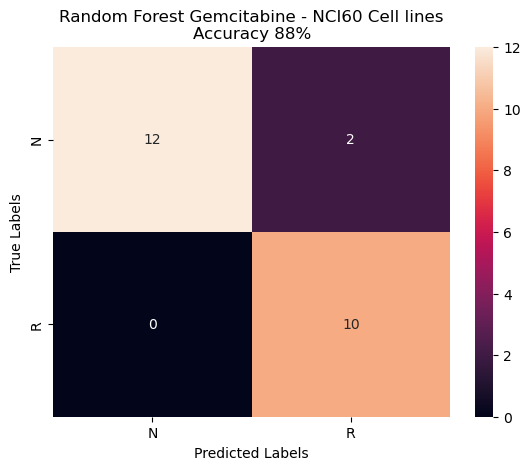

In [15]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots()
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels = ['N', 'R'], yticklabels = ['N', 'R'])
ax.set_title('Random Forest Gemcitabine - NCI60 Cell lines\nAccuracy 88%')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

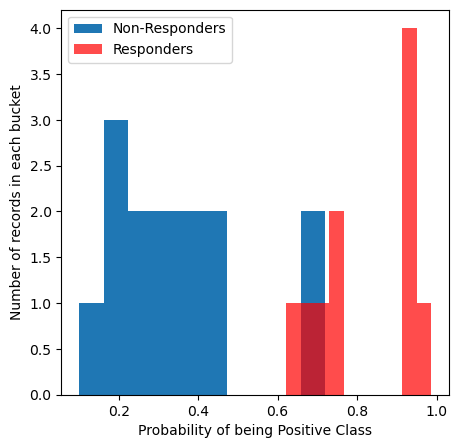

In [16]:
plt.figure(figsize=(5, 5))
plt.hist(prediction[y_test==0], label='Non-Responders')
plt.hist(prediction[y_test==1], label='Responders', alpha=0.7, color='r')
plt.xlabel('Probability of being Positive Class')
plt.ylabel('Number of records in each bucket')
plt.legend()
plt.tick_params(axis='both')
plt.show() 

In [17]:
responders = prediction[y_test == 1]
count = 0
for i in responders: 
    if i >= 0.8:
        count+=1
count, count/len(responders)

(5, 0.5)

In [18]:
df_rf_test = X_test.copy()
df_rf_test.loc[test_index, 'test_proba'] = prediction
df_rf_test.loc[test_index, 'target'] = y_test
df1 = pd.concat([X_train, df_rf_test], sort=False).sort_index()

In [19]:
df1_main = df1.iloc[:49, ]
x = max(prediction[y_test == 0])
df1_main = df1_main.loc[(df1_main['test_proba'] > x)]
df1_main.shape

(1, 2183)

In [20]:
df1_main

,Acetone ; Propanal ; acetone,Acetaldehyde oxime ; HMDB01122,acetate,Urea,Isopropyl alcohol ; Propyl alcohol,Bicarbonate ; Hydrogen carbonate,Dimethylsulfide,3-Butyn-1-al,1-pyrrolinium,Acrylamide,...,"2,4,7,10-hexadecatetraenoylcoa ; 2,7,10,13-hexadecatetraenoylcoa ; 2E,4Z,7Z,10Z-hexadecatetraenoyl-CoA ; 3,7,10,13-hexadecatetraenoylcoa ; 4,7,10,13-hexadecatetraenoylcoa",O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-_6-deoxy-a-L-galactopyranosyl-(1->4)_-O-b-D-galactopyranosyl-(1->4)-O-_6-deoxy-a-L-galactopyranosyl-(1->3)_-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso6_ ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso3_","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z)),test_proba,target
41,0.023178,0.007496,2.458752,0.245802,0.020593,0.06917,0.002531,0.009372,0.002677,0.025707,...,0.03706,0.04541,0.030573,0.060134,0.040286,0.02763,0.043522,0.048938,0.733333,1.0


In [21]:
model2 = SVC(kernel = 'linear', C=1, gamma='auto', probability=True)

rfecv2 = RFECV(model2, min_features_to_select = 1, scoring = 'precision', step = 1, cv = StratifiedKFold(5))
rfecv2.fit(X_train, y_train)

#model2.fit(X_train, y_train)

rfe2 = RFE(model2, n_features_to_select = rfecv2.n_features_, step = 1)
rfe2.fit(X_train, y_train)

prediction2 = rfe2.predict_proba(X_test)[:, 1]
y_pred = rfe2.predict(X_test)
print(f'Accuracy on training data: {accuracy_score(y_train, rfe2.predict(X_train))}')
print(f'Accuracy on testing data: {accuracy_score(y_test, rfe2.predict(X_test))}')
print(classification_report(y_test, y_pred))

Accuracy on training data: 1.0
Accuracy on testing data: 0.75
              precision    recall  f1-score   support

           0       1.00      0.57      0.73        14
           1       0.62      1.00      0.77        10

    accuracy                           0.75        24
   macro avg       0.81      0.79      0.75        24
weighted avg       0.84      0.75      0.74        24



Text(50.722222222222214, 0.5, 'True Labels')

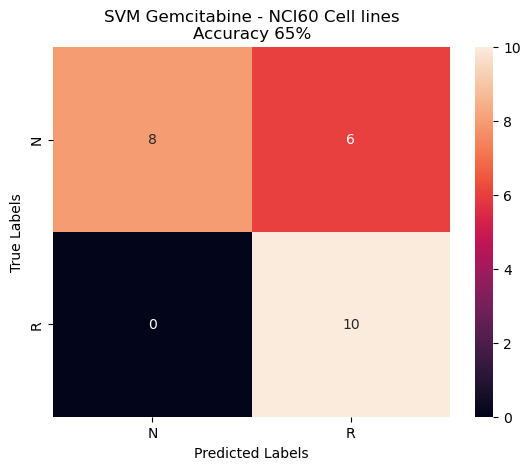

In [22]:
fig, ax = plt.subplots()
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels = ['N', 'R'], yticklabels = ['N', 'R'])
ax.set_title('SVM Gemcitabine - NCI60 Cell lines\nAccuracy 65%')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

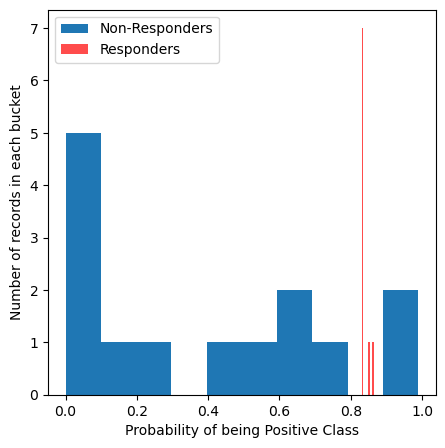

In [23]:
plt.figure(figsize=(5, 5))
plt.hist(prediction2[y_test==0], label='Non-Responders')
plt.hist(prediction2[y_test==1], label='Responders', alpha=0.7, color='r')
plt.xlabel('Probability of being Positive Class')
plt.ylabel('Number of records in each bucket')
plt.legend()
plt.tick_params(axis='both')
plt.show() 

In [24]:
resp_svm = prediction2[y_test == 1]
count = 0
for i in resp_svm:
    if i >= 0.72:
        count+=1
count, count/len(resp_svm)

(10, 1.0)

In [25]:
df_svm_test = X_test.copy()
df_svm_test.loc[test_index, 'test_proba'] = prediction2

df2 = pd.concat([X_train, df_svm_test], sort=False).sort_index()

In [26]:
df2_main = df2.iloc[:49, ]
df2_main = df2_main.loc[(df2_main['test_proba'] > max(prediction2[y_test == 0]))]
df2_main

,Acetone ; Propanal ; acetone,Acetaldehyde oxime ; HMDB01122,acetate,Urea,Isopropyl alcohol ; Propyl alcohol,Bicarbonate ; Hydrogen carbonate,Dimethylsulfide,3-Butyn-1-al,1-pyrrolinium,Acrylamide,...,"TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso3_","2,4,7,10-hexadecatetraenoylcoa ; 2,7,10,13-hexadecatetraenoylcoa ; 2E,4Z,7Z,10Z-hexadecatetraenoyl-CoA ; 3,7,10,13-hexadecatetraenoylcoa ; 4,7,10,13-hexadecatetraenoylcoa",O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-_6-deoxy-a-L-galactopyranosyl-(1->4)_-O-b-D-galactopyranosyl-(1->4)-O-_6-deoxy-a-L-galactopyranosyl-(1->3)_-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso6_ ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso3_","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z)),test_proba


In [27]:
model3 = XGBClassifier()
#model3.fit(X_train, y_train)

rfecv3 = RFECV(model3, min_features_to_select=1, step=1, scoring='precision', cv=StratifiedKFold(5))
rfecv3.fit(X_train, y_train)

#prediction3 = model3.predict_proba(X_test)[:, 1]

rfe3 = RFE(model3, n_features_to_select = rfecv3.n_features_, step = 1)
rfe3.fit(X_train, y_train)
prediction3 = rfe3.predict_proba(X_test)[:, 1]
y_pred = rfe3.predict(X_test)

print(f'Accuracy on training data: {accuracy_score(y_train, rfe3.predict(X_train))}')
print(f'Accuracy on testing data: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy on training data: 0.9583333333333334
Accuracy on testing data: 0.875
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.77      1.00      0.87        10

    accuracy                           0.88        24
   macro avg       0.88      0.89      0.87        24
weighted avg       0.90      0.88      0.88        24



Text(50.722222222222214, 0.5, 'True Labels')

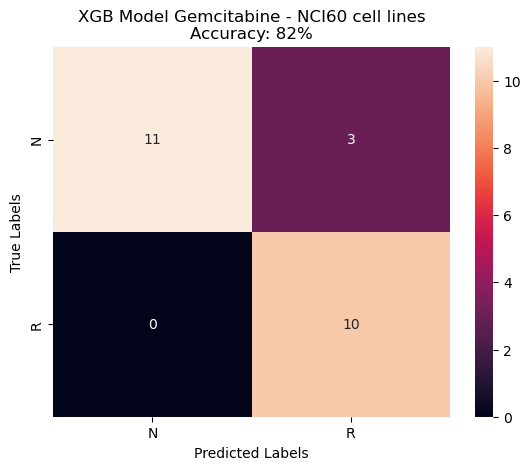

In [28]:
fig, ax = plt.subplots()
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, xticklabels = ['N', 'R'], yticklabels = ['N', 'R'])
ax.set_title('XGB Model Gemcitabine - NCI60 cell lines\nAccuracy: 82%')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

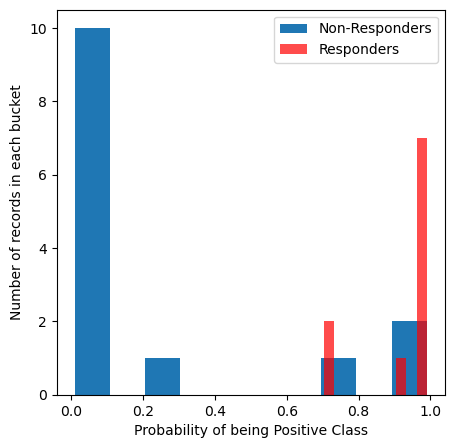

In [29]:
plt.figure(figsize=(5, 5))
plt.hist(prediction3[y_test==0], label='Non-Responders')
plt.hist(prediction3[y_test==1], label='Responders', alpha=0.7, color='r')
plt.xlabel('Probability of being Positive Class')
plt.ylabel('Number of records in each bucket')
plt.legend()
plt.tick_params(axis='both')
plt.show() 

In [30]:
resp_xg = prediction3[y_test == 1]
count = 0
for i in resp_xg:
    if i >= 0.93:
        count += 1
count, count/len(resp_xg)

(7, 0.7)

In [31]:
resp_xg

array([0.989795  , 0.99040246, 0.9792753 , 0.9905918 , 0.989795  ,
       0.7079038 , 0.9808775 , 0.989795  , 0.92494607, 0.70379573],
      dtype=float32)

In [32]:
max(prediction3[y_test == 0])

0.99040246

In [33]:
df_xg = X_test.copy()
df_xg.loc[test_index, 'test_proba'] = prediction3

df3 = pd.concat([X_train, df_xg], sort=False).sort_index()
df3

,Acetone ; Propanal ; acetone,Acetaldehyde oxime ; HMDB01122,acetate,Urea,Isopropyl alcohol ; Propyl alcohol,Bicarbonate ; Hydrogen carbonate,Dimethylsulfide,3-Butyn-1-al,1-pyrrolinium,Acrylamide,...,"TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso3_","2,4,7,10-hexadecatetraenoylcoa ; 2,7,10,13-hexadecatetraenoylcoa ; 2E,4Z,7Z,10Z-hexadecatetraenoyl-CoA ; 3,7,10,13-hexadecatetraenoylcoa ; 4,7,10,13-hexadecatetraenoylcoa",O-b-D-glucopyranosyl-(1->3)-O-2-(acetylamino)-2-deoxy-b-D-glucopyranosyl-(1->3)-O-_6-deoxy-a-L-galactopyranosyl-(1->4)_-O-b-D-galactopyranosyl-(1->4)-O-_6-deoxy-a-L-galactopyranosyl-(1->3)_-D-Glucose,LS tetrasaccharide d ; Sialyllacto-N-neotetraose c ; Sialyllacto-N-tetraose a ; Sialyllacto-N-tetraose b ; Sialyllacto-N-tetraose c,PIP2(16:0/18:0) ; PIP2(18:0/16:0),"TG(22:5(7Z,10Z,13Z,16Z,19Z)/20:5(5Z,8Z,11Z,14Z,17Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso6_ ; TG(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/20:4(5Z,8Z,11Z,14Z)/22:6(4Z,7Z,10Z,13Z,16Z,19Z))_iso3_","(2E)-Hexadecenoyl-CoA ; 2,7,10-hexadecatrienoylcoa ; 3,7,10-hexadecatrienoylcoa ; 3Z,7Z,10Z-hexadecatrienoyl-CoA ; 4,7,10-hexadecatrienoylcoa ; 4Z,7Z,10Z-hexadecatrienoyl-CoA ; 7,10,13-hexadecatrienoylcoa ; trans,cis,cis-2,7,10-hexadecatrienoyl-CoA",Lacto-N-difucohexaose ; Lacto-N-difucopentaose II,Galabiosylceramide (d18:1/26:1(17Z)) ; Lactosylceramide (d18:1/26:1(17Z)),test_proba
0,0.021811,0.006137,1.801231,0.178675,0.031762,0.143416,0.004437,0.001118,0.002353,0.013185,...,0.029462,0.029300,0.036367,0.025836,0.075427,0.036502,0.019935,0.032820,0.039391,NaN
1,0.010611,0.006815,0.884542,0.093390,0.016027,0.037372,0.000000,0.005778,0.003199,0.011203,...,0.026807,0.021282,0.024981,0.013982,0.054200,0.029125,0.010750,0.015981,0.035154,NaN
2,0.030946,0.006278,3.830076,0.384303,0.027088,0.065463,0.002946,0.009472,0.002344,0.010895,...,0.031639,0.026098,0.029986,0.025863,0.053371,0.038207,0.023270,0.030655,0.040250,NaN
3,0.008574,0.005661,0.296663,0.035179,0.005575,0.026321,0.001608,0.020112,0.003865,0.016057,...,0.029439,0.032452,0.034177,0.022305,0.080242,0.029226,0.019556,0.033062,0.040780,NaN
4,0.012726,0.003326,0.000000,0.000000,0.005354,0.037794,0.002402,0.013558,0.003402,0.013344,...,0.023395,0.027523,0.018876,0.016423,0.057103,0.022155,0.011501,0.014310,0.034584,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.031925,0.005804,3.028743,0.304995,0.027202,0.092063,0.003783,0.008728,0.002514,0.009840,...,0.033537,0.026050,0.038807,0.029652,0.069765,0.038121,0.024223,0.039924,0.041302,0.980878
68,0.029890,0.006262,3.595657,0.360544,0.027628,0.074470,0.003118,0.008507,0.002345,0.011160,...,0.031387,0.026468,0.030723,0.025860,0.055920,0.038010,0.022885,0.030905,0.040151,NaN
69,0.012039,0.004655,1.321657,0.135105,0.013816,0.041576,0.000979,0.005128,0.002508,0.008441,...,0.027455,0.021383,0.029972,0.020211,0.055052,0.029955,0.016825,0.025271,0.037940,NaN
70,0.027040,0.011694,1.676819,0.170727,0.025575,0.110793,0.003361,0.005514,0.002525,0.014554,...,0.031864,0.028749,0.031918,0.023751,0.069822,0.045221,0.022718,0.030982,0.045954,0.979275


In [ ]:
df3_main = df3.iloc[:49, ]
df3_main = df3_main.loc[(df3_main['test_proba'] > max(prediction3[y_test == 0]))]
df3_main.shape

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)

In [ ]:
dict(zip(unique, counts))

In [ ]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

In [ ]:
data.shape

In [ ]:
X.shape

In [ ]:
common_list = []
common_list.extend(list(df1_main.index.values))
common_list.extend(list(df2_main.index.values))
common_list.extend(list(df3_main.index.values))
cl = set(common_list)

In [ ]:
with open('master_list_metabolomics.txt', 'a+') as f:
    for i in cl:
        f.write(f'{i}\n')

In [ ]:
df1_total = df1.iloc[:49, ]
df1_total = df1_total.loc[df1_total['target'] == 1.0]
df1_total

In [ ]:
l = list(df1_total.index.values)
with open('total_metabolomics.txt', 'a+') as f:
    for i in l:
        f.write(f'{i}\n')

In [ ]:
l

In [ ]:
cl